# Model Selection
Diferent algorithms will be run to find the one with the best metrics and results for this problem

In [1]:
#Setup
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)
import matplotlib.pyplot as plt

# csv loading 

load train and test set

In [2]:
import pathlib
pathlib.Path.cwd()

#Loading train set
path = pathlib.Path.cwd() / 'process sets' / 'xtrain_sel.csv'
x_train = pd.read_csv(path, index_col= None)
path = pathlib.Path.cwd() / 'process sets' / 'ytrain_sel.csv'
y_train = pd.read_csv(path, index_col= None)


#Loading test set
path = pathlib.Path.cwd() / 'process sets' / 'xtest_sel.csv'
x_test = pd.read_csv(path, index_col= None)
path = pathlib.Path.cwd() / 'process sets' / 'ytest_sel.csv'
y_test= pd.read_csv(path, index_col= None)



#Preventive reset index and squeeze to avoid bugs
y_train.reset_index(inplace=True)
y_train.drop("index", axis= 1, inplace=True)
y_train = y_train.squeeze()



x = x_train.copy()
y = y_train.copy()



# Defining cross validaton score function

In [3]:
#Crossvalidate and display score function based in mean squared error

def cross_score(model,x,y):
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model, x, y,
                         scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores
  
    
    

    

# Def model functions 

Since some models are stochastical and doesnt show the same result in every run, we run them n times and average the resulting evaluation metrics to choose the best

Models:
- Linear Regressor
- Decision Tree Regressor
- Random Forest Regressor
- Support vector machine regressor
- KG-Boost Regressor
- K-n Neighbor regressor
- Lasso Regressor

In [4]:
#Number of times to run each model
nloop= 10


#Defining Linear Regression function

def lin_loop(x,y):
    
    #Rmse acumulation variable
    rmseacum = 0
    
    #Model import
    from sklearn.linear_model import LinearRegression
    
    #Loop of model run
    for i in range (nloop):
        model_reg = LinearRegression()
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores


#------------------------------------------------------------------------------------------------------------
# Defining Decision Tree Regression function

def dtr_loop(x,y):
    #Rmse acumulation variable
    rmseacum = 0
    
    #Loop of model run
    from sklearn.tree import DecisionTreeRegressor
    
    for i in range (nloop):
        model_reg = DecisionTreeRegressor()
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    #Scores average metrics
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores



#------------------------------------------------------------------------------------------------------------
#Defining Random Forest regression function

def rfr_loop(x,y):
    
    rmseacum = 0
    from sklearn.ensemble import RandomForestRegressor
   
    for i in range (nloop):
        model_reg = RandomForestRegressor()
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    #Scores average metrics
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores


#------------------------------------------------------------------------------------------------------------


#Defining Support Vector Regression function

def svr_loop(x,y):
    #Rmse acumulation variable
    rmseacum = 0
    from sklearn.svm import SVR
   

    #Loop of model run
    for i in range (nloop):
        model_reg =  SVR(kernel="linear")
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    
    
    #Scores average metrics
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores


#------------------------------------------------------------------------------------------------------------
#Defining XGBOOST Regression function
def xg_loop(x,y):
    
    rmseacum = 0
    import xgboost
    print(xgboost.__version__)
    from xgboost import XGBRegressor
   
    for i in range (nloop):
        model_reg =  XGBRegressor()
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    
    #Scores average metrics
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores

#------------------------------------------------------------------------------------------------------------
#Defining K-n Neighbors Regressor function


def kn_loop(x,y):
    
    rmseacum = 0
    from sklearn.neighbors import KNeighborsRegressor
   
    for i in range (nloop):
        model_reg =  KNeighborsRegressor()
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    #Scores average metrics
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores




#------------------------------------------------------------------------------------------------------------
#Defining Lasso Regressor function
def lasso_loop(x,y):
    
    rmseacum = 0
    from sklearn.linear_model import Lasso
   
    for i in range (nloop):
        model_reg =  Lasso()
        model_reg.fit(x, y)
        model=  model_reg
        
        
        
        
        #Scores acumulator using cross validation function
        scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        rmseacum= rmseacum + rmse_scores
        print("it", i)
    
    #Scores average metrics
    rmse_scores = rmseacum/nloop
    print("Model:", str(model))
    print("Scores:",  rmse_scores)
    print("MAE:", round( rmse_scores.mean(),3))
    print("RMEE:",round(  rmse_scores.std(), 3))
    print("MAE / data mean:", round( (rmse_scores.mean()/ y.mean()),3))
    print("RMEE / data std:",round(  (rmse_scores.std()/ y.std()), 3))
    
    
    return rmse_scores





# Models Results

In [5]:
from sklearn.model_selection import cross_val_score

#LR RMSE
lin_mod = lin_loop(x,y)
#DTR RMSE
dtr_mod = dtr_loop(x,y)
#Random Forest RMSE
rfr_mod= rfr_loop(x,y)
#SVR RMSE
svr_mod= svr_loop(x,y)
#K-n RMSE
kn_mod= kn_loop(x,y)
#Lasso RMSE
lasso_mod = lasso_loop(x,y)
#Xg boost RMSE
xg_mod = xg_loop(x,y)

it 0
it 1
it 2
it 3
it 4
it 5
it 6
it 7
it 8
it 9
Model: LinearRegression()
Scores: [58937.3798169  28709.72573867 31374.80687159 35240.08627964
 40750.63842641 23427.99333511 27727.78355793 30789.63938308
 46884.17401914 26799.92249634]
MAE: 35064.215
RMEE: 10352.741
MAE / data mean: 0.194
RMEE / data std: 0.13
it 0
it 1
it 2
it 3
it 4
it 5
it 6
it 7
it 8
it 9
Model: DecisionTreeRegressor()
Scores: [53016.80365556 41765.75365772 43728.985807   40190.6320584
 38365.75029055 32130.80698462 36492.45215896 37118.78287098
 47083.01263986 34323.73421758]
MAE: 40421.671
RMEE: 5935.546
MAE / data mean: 0.223
RMEE / data std: 0.075
it 0
it 1
it 2
it 3
it 4
it 5
it 6
it 7
it 8
it 9
Model: RandomForestRegressor()
Scores: [38847.30013617 26278.35474188 25109.70298525 31496.02620255
 29674.81932385 23314.26846102 26808.67880035 27666.81193781
 44949.02329306 24046.49537378]
MAE: 29819.148
RMEE: 6612.881
MAE / data mean: 0.165
RMEE / data std: 0.083
it 0
it 1
it 2
it 3
it 4
it 5
it 6
it 7
it 8
it 9

In [6]:
#Selecting best

#model  results
modelos =[lin_mod,dtr_mod, rfr_mod, svr_mod, kn_mod, lasso_mod, xg_mod]
#model names
modelos_nombres= ["linear reg","dt reg", "random forest reg", "SV Reg", "Kn Reg", "Lasso Reg", "XgBoost"]

#Initial proposed high Mae and RMSE to be replaced by a better one with models in the next cycle
BestMAE = 10000000
BestRMEE = 10000000


#Finding best model with this cicle (normalized by expected mean and standar deviation)
for n,i in enumerate (modelos):
    #Normalizing results
    MAE = (i.mean()/ y.mean())
    RMEE =(i.std()/ y.std())
    
    #Saving top model bases in MAE and RMSE
    if MAE < BestMAE:
        BestMAE= MAE
        ModelMAE= modelos_nombres[n]
    if RMEE < BestRMEE:
        BestRMEE= RMEE
        ModelRMEE= modelos_nombres[n]
        
    
    
#printing
print("Best MAE model: ", ModelMAE , "MAE: ", BestMAE)
print("Best RMSE model: ", ModelRMEE , "RMSE: ", BestRMEE)

Best MAE model:  random forest reg MAE:  0.1645763042170381
Best RMSE model:  dt reg RMSE:  0.07470784601465019


# Choosed Model 


The choosed model to work with is Random Forest Regression, because it has low MAE and RMSE

# Hyperparamater Tuning of Random Forest Regression

- We can use grid search 
- We can use randomized search

We will use randomized search approximation

# Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [8]:
#Best Params
grid_search.best_params_


#Best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [9]:
# Grid search all possible combinations
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("sqt mean error: ", np.sqrt(-mean_score),  params)
    
    


sqt mean error:  36699.870050839854 {'max_features': 2, 'n_estimators': 3}
sqt mean error:  32793.10325435628 {'max_features': 2, 'n_estimators': 10}
sqt mean error:  31458.089978869604 {'max_features': 2, 'n_estimators': 30}
sqt mean error:  35653.668075661975 {'max_features': 4, 'n_estimators': 3}
sqt mean error:  32411.88977480537 {'max_features': 4, 'n_estimators': 10}
sqt mean error:  31166.5177205135 {'max_features': 4, 'n_estimators': 30}
sqt mean error:  34213.17861855719 {'max_features': 6, 'n_estimators': 3}
sqt mean error:  31621.453023347487 {'max_features': 6, 'n_estimators': 10}
sqt mean error:  30385.830853619733 {'max_features': 6, 'n_estimators': 30}
sqt mean error:  34023.0020723454 {'max_features': 8, 'n_estimators': 3}
sqt mean error:  31131.855019379138 {'max_features': 8, 'n_estimators': 10}
sqt mean error:  29988.117689734587 {'max_features': 8, 'n_estimators': 30}
sqt mean error:  36649.80807552118 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
sqt m

# Random Search

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Parameter distibution limits
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }


forest_reg = RandomForestRegressor(random_state=42)
#running random search
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f976e89d250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f976e8b5be0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [11]:
#Showing all parameters
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

#Showing the best estimator
rnd_search.best_params_

29995.680519249894 {'max_features': 7, 'n_estimators': 180}
31144.8907908471 {'max_features': 5, 'n_estimators': 15}
30263.984734829122 {'max_features': 3, 'n_estimators': 72}
30842.33175925967 {'max_features': 5, 'n_estimators': 21}
30063.12349033762 {'max_features': 7, 'n_estimators': 122}
30182.633404015352 {'max_features': 3, 'n_estimators': 75}
29897.267059738264 {'max_features': 3, 'n_estimators': 88}
29971.637256400685 {'max_features': 5, 'n_estimators': 100}
29997.552885294186 {'max_features': 3, 'n_estimators': 150}
36157.172712934494 {'max_features': 5, 'n_estimators': 2}


{'max_features': 3, 'n_estimators': 88}

In [12]:
#Showing future importances for the best model
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

attributes = list(x.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.22193843032575272, 'OverallQual'),
 (0.18547357122156197, 'GrLivArea'),
 (0.09975365810044305, 'GarageCars'),
 (0.08871356645158868, 'ExterQual'),
 (0.0774430698079306, 'YearBuilt'),
 (0.07517701956936046, '1stFlrSF'),
 (0.07100224858900141, 'TotalBsmtSF'),
 (0.045195660085231695, '2ndFlrSF'),
 (0.04452941178622579, 'BsmtFinSF1'),
 (0.03593994616455523, 'TotRmsAbvGrd'),
 (0.02985089055098579, 'KitchenQual'),
 (0.02498252734736268, 'BsmtQual')]

# Evaluate your model in the test set

In [13]:
#Loading test set

# dependent features (independent feature)
xt = x_test.copy()

# y feature (expected feature)
yt = y_test.copy()

#Preventive reset index and squeeze to avoid bugs
yt.reset_index(inplace=True)
yt.drop("index", axis= 1, inplace=True)
yt = yt.squeeze()


#mean square error

from sklearn.metrics import mean_squared_error
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(xt)
final_mse = mean_squared_error(yt, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Mean square error total sum", final_mse)
print("Root mean square error total sum", final_rmse)





Mean square error total sum 689434591.4845568
Root mean square error total sum 26257.0865003061


# Dataframe with results

Error max  =  142.9
Error mean  =  12.1582191780822
Error std  =  18678.567688787796


,OverallQual,GrLivArea,2ndFlrSF,BsmtFinSF1,GarageCars,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,YearBuilt,ExterQual,KitchenQual,BsmtQual,Predicted,Expected,Error abs,Error %
0,0.555556,0.593095,0.426634,0.114812,0.50,0.416667,0.134861,0.377220,0.074074,1.000000,0.666667,0.5,206379.500000,204750,1630.0,0.8
1,0.777778,0.604401,0.000000,0.172927,0.50,0.416667,0.301800,0.646573,0.029630,0.333333,0.666667,0.5,280484.647727,257000,23485.0,9.1
2,0.444444,0.484528,0.000000,0.163359,0.25,0.250000,0.215057,0.518336,0.392593,1.000000,1.000000,1.0,159430.681818,145000,14431.0,10.0
3,0.444444,0.417112,0.000000,0.056697,0.50,0.333333,0.177741,0.446217,0.414815,1.000000,1.000000,1.0,130897.727273,144900,14002.0,9.7
4,0.666667,0.589312,0.340436,0.087704,0.50,0.250000,0.174141,0.438472,0.140741,0.333333,0.666667,0.5,208157.397727,239000,30843.0,12.9
5,0.555556,0.470245,0.000000,0.173281,0.50,0.333333,0.206547,0.503056,0.229630,1.000000,1.000000,0.5,166941.113636,181500,14559.0,8.0


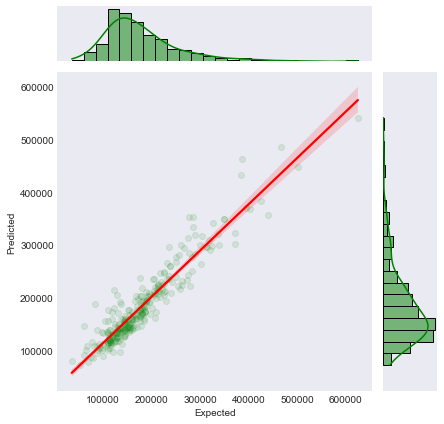

In [14]:
#Creating a base dataframe
df = pd.DataFrame(xt)

#Adding predicted, expected, error abs and error % columns
df["Predicted"] = final_predictions
df["Expected"] = yt
df["Error abs"] =  (round(abs((df["Expected"] - df["Predicted"]) )))
df["Error %"] = (round(abs((df["Expected"] - df["Predicted"]) )/ df["Expected"],3))*100

#Printing maximum error, error mean and error std
print("Error max  = " ,(df["Error %"].max()))
print("Error mean  = " ,(df["Error %"].mean()))
print("Error std  = " ,(df["Error abs"].std()))


import seaborn as sns

#Plot Predicted distribution
plt.style.use('seaborn-dark')
sns.jointplot(x="Expected" , y ="Predicted", data = df, kind= "reg" , palette= "viridis", color="green",  joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

df.head(6)

# Save Model

In [15]:
#TO SAVE
import joblib
path = pathlib.Path.cwd() / 'process sets' / 'housing_model.sav'

filename = path
joblib.dump(final_model , filename)

['/Users/kike/Python/Machine Learning/Proyecto Regresion/process sets/housing_model.sav']

In [16]:
#TO LOAD
import joblib

loaded_model = joblib.load(filename)
result = loaded_model.predict(x)
print("ready")

ready
